<a href="https://colab.research.google.com/github/LeowYR/DSL_Homework/blob/main/VerilogGitHomework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup - LYR copy

In [1]:
!pip install git+https://github.com/pe8sutd/eda4u &> /dev/null
!git clone https://github.com/pe8sutd/eda4u &> /dev/null
%load_ext plugin

# Hi Prof 😀, I have tested the code with monitors in addition to the waveforms as the waveforms can be too small to read easily, have also change the outputs to "reg" type to enable the code to run properly. For all tasks have tested to fufil the truth table, except for the last where theres no truth table so I made an extra input case to verify that the math was working.

# Homework

Copy this ipynb to your Github and link to Google Colab for Verilog HDL simulation.

Submit the copy of ipynb with complete solution to the DSL Edimension: Homework Submission.

# Q1-Decade Counter

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the decade_counter as shown below using if-else statements.
3. Submit this file to DSL edimension for assessment;
4. The specification of the decade_counter are:
  - When "rst" is high, the output "count" and output "ten" are set to ‘0’ immediately and counting is disabled.
  - When "rst" is low, the circuit increments on every positive edge of the clk.
  - The highest count that can be reached is 4'b1001, after which the count will restart from 4'b0000 again.
  - Only when the count is 4'b1001, the output ten is set to ‘1’ else the output ten will always be set to ‘0’.

5. Write a Verilog test stimulus module for the decade_counter and verify its proper operation as follows:
  - Create a clock (Period: 20 unit time);
  - Test for reset active;
  - Then test for the counting for 1 complete count cycles ie: counting from 4'b0000 to 4'b1001;
  - Use Weveform Viewer for viewing the inputs and outputs;
  - Here is Verilog code template.

In [48]:
%%verilog

//!DO NOT EDIT MODULE NAME AND PORT NAME!
// I edited output type to "reg" to make code work
//tested monitor to show code works as the I also have the waveform but is very hard to see due to how long the img is

module decade_counter(
    input clk,
    input rst,
    output reg [3:0] count,
    output reg ten
);

//YOUR CODE HERE

always @(posedge clk) begin
    if (rst) begin
        count <= 4'b0000;
        ten <= 1'b0;
    end else begin
        if (count == 4'b1001) begin
            count <= 4'b0000;
            ten <= 1'b1;
        end else begin
            count <= count + 1'b1;
            ten <= 1'b0;
        end
   end
end

endmodule
////

//!DO NOT EDIT MODULE NAME AND PORT NAME!
module decade_counter_tb();

reg clk;
reg rst;
wire [3:0]count;
wire ten;

decade_counter c1(clk,rst,count,ten);

always begin

    //YOUR CODE HERE - Generate 20 unit time clock;

    #10 clk = ~clk; //for #20 period, swich every #10

end

initial begin

    //YOUR CODE HERE - Initialize the clk, rst;
    clk = 0;
    rst = 1;
    #20 rst = 0;
    #231 $finish; // Test for 1 complete count cycle + 1 extra count to be sure it repeats properly

end

initial
  $monitor($time, "clk=%b,rst=%b,count=%b,ten=%b",clk,rst,count,ten);

initial begin
  $dumpfile("decade_counter_tb.vcd");
  $dumpvars(0,decade_counter_tb);
  #231 $finish;
 end


endmodule
//

VCD info: dumpfile decade_counter_tb.vcd opened for output.
                   0clk=0,rst=1,count=xxxx,ten=x
                  10clk=1,rst=1,count=0000,ten=0
                  20clk=0,rst=0,count=0000,ten=0
                  30clk=1,rst=0,count=0001,ten=0
                  40clk=0,rst=0,count=0001,ten=0
                  50clk=1,rst=0,count=0010,ten=0
                  60clk=0,rst=0,count=0010,ten=0
                  70clk=1,rst=0,count=0011,ten=0
                  80clk=0,rst=0,count=0011,ten=0
                  90clk=1,rst=0,count=0100,ten=0
                 100clk=0,rst=0,count=0100,ten=0
                 110clk=1,rst=0,count=0101,ten=0
                 120clk=0,rst=0,count=0101,ten=0
                 130clk=1,rst=0,count=0110,ten=0
                 140clk=0,rst=0,count=0110,ten=0
                 150clk=1,rst=0,count=0111,ten=0
                 160clk=0,rst=0,count=0111,ten=0
                 170clk=1,rst=0,count=1000,ten=0
                 180clk=0,rst=0,count=1000,ten=0
         

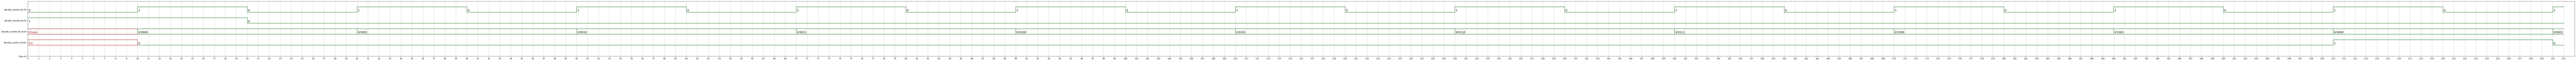

In [49]:
%%waveform decade_counter_tb.vcd
#results with waveform
sign_list = ['decade_counter_tb.clk','decade_counter_tb.rst','decade_counter_tb.count','decade_counter_tb.ten']
time_begin = 0
time_end = 231
base = 'bin' # bin, dec, dec2, hex, octal

6. The following figure is the test results for reference only. Your results maybe cover more test case if required.

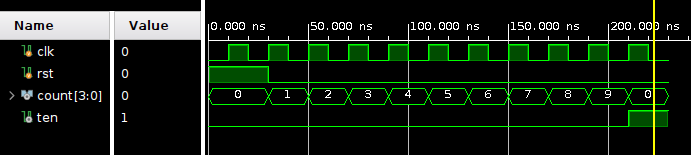

# Q2-Multiplexer

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the multiplexer as shown below using case statements.
3. The specifications of the multiplexer are:
  - The circuit is a 4-to-1 multiplexer;
  - The inputs A, B, C, D and output X are all 2-bit vectors;
  - Output X will be equal to either one of the 4 inputs depending on the 4 combinations of 2-bits signal SEL. The following True-table details the relationship between SEL and output X;

| SEL   | OUTPUT X |
|-------|----------|
| 2'b00 | A        |
| 2'b01 | B        |
| 2'b10 | C        |
| 2'b11 | D        |


4. Write a Verilog test stimulus module for the multiplexer;


In [50]:
%%verilog

//!DO NOT EDIT MODULE NAME AND PORT NAME!

// I edited output type to "reg" to make code work
// have put in both waveform and monitor test to proof working

module multiplexer(
    input [1:0]A,
    input [1:0]B,
    input [1:0]C,
    input [1:0]D,
    input [1:0]SEL,
    output reg [1:0]X
);

//YOUR CODE HERE
//TIPS: IN THE VERILOG CASE STATEMENT, YOU HAVE TO LIST ALL CONDITION TO AVIOD ANY AMBIGUOUS STATEMENT;

always @(*) begin
    case(SEL)
        2'b00: X = A;
        2'b01: X = B;
        2'b10: X = C;
        2'b11: X = D;
        default: X = 2'bxx; // Assign a default value to avoid latches
    endcase
end

endmodule

//TESTBENCH HERE

module multiplexer_tb();

reg [1:0]A;
reg [1:0]B;
reg [1:0]C;
reg [1:0]D;
reg [1:0]SEL;
wire [1:0]X;

multiplexer mx(A, B, C, D, SEL, X);


initial begin
    A = 2'b00;
    B = 2'b01;
    C = 2'b10;
    D = 2'b11;
    SEL = 2'b00; #10;
    SEL = 2'b01; #10;
    SEL = 2'b10; #10;
    SEL = 2'b11; #10;
    $finish;
end

initial
  $monitor($time," A=%b, B=%b, C=%b, D=%b, SEL=%b, X=%b",A, B, C, D, SEL, X);

initial begin
  $dumpfile("mx_tb.vcd");
  $dumpvars(0,multiplexer_tb);
  #41 $finish;
 end

endmodule



VCD info: dumpfile mx_tb.vcd opened for output.
                   0 A=00, B=01, C=10, D=11, SEL=00, X=00
                  10 A=00, B=01, C=10, D=11, SEL=01, X=01
                  20 A=00, B=01, C=10, D=11, SEL=10, X=10
                  30 A=00, B=01, C=10, D=11, SEL=11, X=11



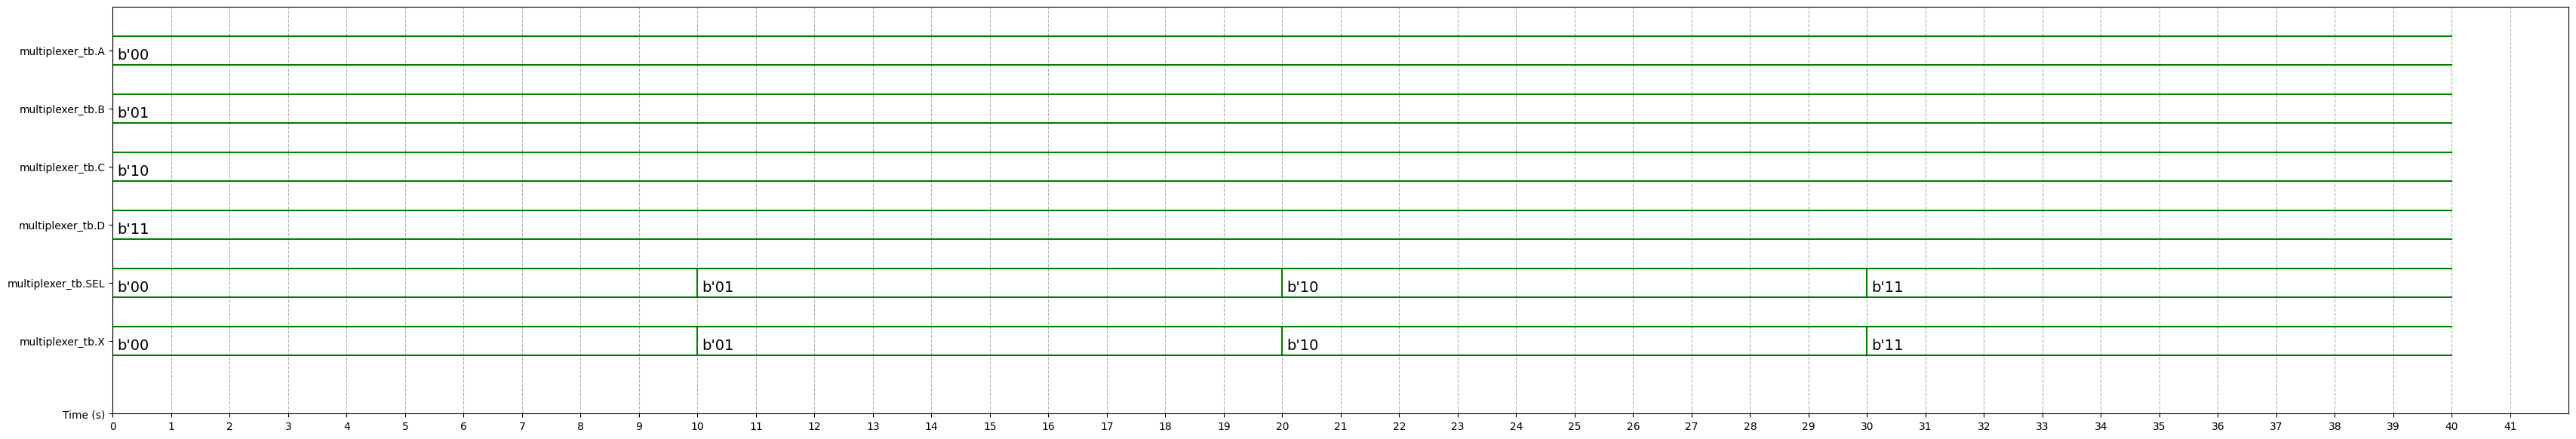

In [51]:
%%waveform mx_tb.vcd
#results with waveform
sign_list = ['multiplexer_tb.A', 'multiplexer_tb.B', 'multiplexer_tb.C', 'multiplexer_tb.D', 'multiplexer_tb.SEL', 'multiplexer_tb.X']
time_begin = 0
time_end = 41
base = 'bin' # bin, dec, dec2, hex, octal

5. Here is a demo testbench result for the multiplexer;

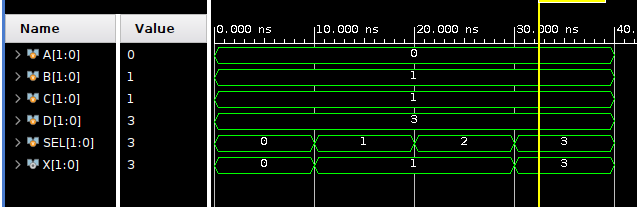

# Q3-Demultiplexer

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the demultiplexer as shown below using case statements. Saved the Verilog description as q3_xxxxxxx.v, and q3_tb_xxxxxxx.v;
3. The specifications of the demultiplexer are:
  - It is a 1-to-4 demultiplexer.
  - Input A and outputs W, X, Y, and Z are all 2-bit vectors.
  - SEL is a 2-bit select input.
  - Each of the 4 combinations of SEL will determine which of the 4 outputs will receive the value of input A.
  - When one output is equal to A, all other outputs are equal to ‘0’.

| SEL   | OUTPUT W | OUTPUT X | OUTPUT Y | OUTPUT Z |
|-------|----------|----------|----------|----------|
| 2'b00 | A        | 2'b00    | 2'b00    | 2'b00    |
| 2'b01 | 2'b00    | A        | 2'b00    | 2'b00    |
| 2'b10 | 2'b00    | 2'b00    | A        | 2'b00    |
| 2'b11 | 2'b00    | 2'b00    | 2'b00    | A        |


4. Write a Verilog test stimulus module for the demultiplexer;





In [52]:
%%verilog

//!DO NOT MODIFY MODULE NAME AND PORT NAME!

// I edited output type to "reg" to make code work
// have put in both waveform and monitor test to proof working

module demultiplexer(
    input [1:0]A,
    input [1:0]SEL,
    output reg [1:0]W,
    output reg [1:0]X,
    output reg [1:0]Y,
    output reg [1:0]Z
    );

//YOUR CODE HERE

always @(*) begin
    case (SEL)
        2'b00: begin
            W = A;
            X = 2'b00;
            Y = 2'b00;
            Z = 2'b00;
        end
        2'b01: begin
            W = 2'b00;
            X = A;
            Y = 2'b00;
            Z = 2'b00;
        end
        2'b10: begin
            W = 2'b00;
            X = 2'b00;
            Y = A;
            Z = 2'b00;
        end
        2'b11: begin
            W = 2'b00;
            X = 2'b00;
            Y = 2'b00;
            Z = A;
        end
        default: begin
            W = 2'b00;
            X = 2'b00;
            Y = 2'b00;
            Z = 2'b00;
        end
    endcase
end

endmodule


//TESTBENCH HERE
module demultiplexer_tb();

reg [1:0] A;
reg [1:0] SEL;
wire [1:0] W;
wire [1:0] X;
wire [1:0] Y;
wire [1:0] Z;

demultiplexer dmx(A,SEL,W,X,Y,Z);

initial begin
    A = 2'b10;
    SEL = 2'b00; #10;
    SEL = 2'b01; #10;
    SEL = 2'b10; #10;
    SEL = 2'b11; #10;
    $finish;
end

initial
  $monitor($time," A=%b,SEL=%b,W=%b,X=%b,Y=%b,Z=%b",A,SEL,W,X,Y,Z);

initial begin
  $dumpfile("dmx_tb.vcd");
  $dumpvars(0,demultiplexer_tb);
  #41 $finish;
 end

endmodule


VCD info: dumpfile dmx_tb.vcd opened for output.
                   0 A=10,SEL=00,W=10,X=00,Y=00,Z=00
                  10 A=10,SEL=01,W=00,X=10,Y=00,Z=00
                  20 A=10,SEL=10,W=00,X=00,Y=10,Z=00
                  30 A=10,SEL=11,W=00,X=00,Y=00,Z=10



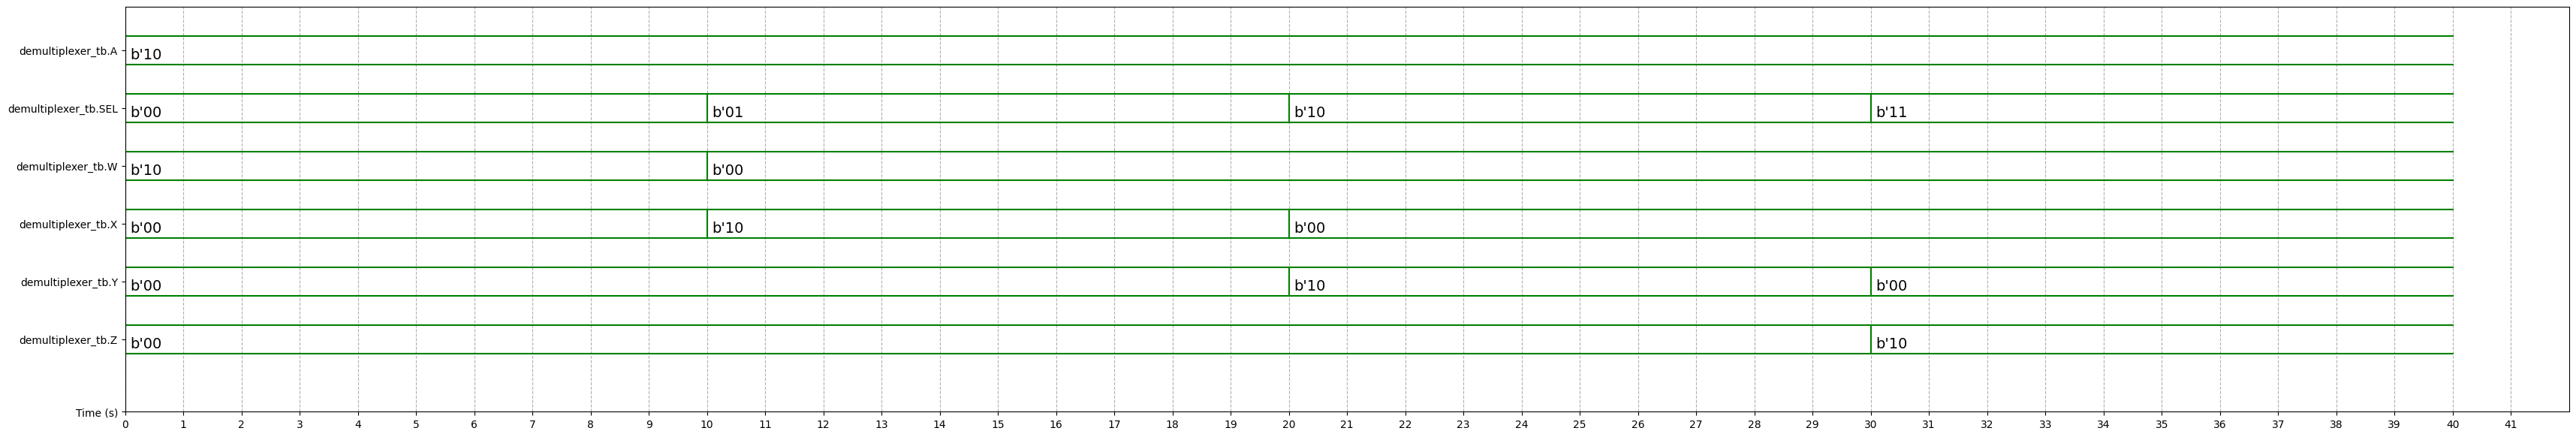

In [53]:
%%waveform dmx_tb.vcd
#results with waveform
sign_list = ['demultiplexer_tb.A', 'demultiplexer_tb.SEL', 'demultiplexer_tb.W', 'demultiplexer_tb.X', 'demultiplexer_tb.Y', 'demultiplexer_tb.Z']
time_begin = 0
time_end = 41
base = 'bin' # bin, dec, dec2, hex, octal

5. Here is a demo testbench result for the demultiplexer;

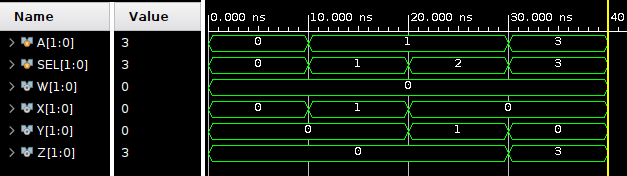

# Q4-Nibbleadd

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the nibbleadd.
3. The specifications for this module nibbleadd are:
  - Inputs A and B are both 8-bit vector inputs. Output q is 5-bit wide.
  - When ctrl input is ‘0’, output is the sum of lowest 4 bits of A and B.
  - When ctrl input is ‘1’, output is the sum of upper 4 bits of A and B.
  - Here is Verilog code template. You have to copy the template into your source file.

4. Write a Verilog test stimulus module for the nibbleadd;

In [54]:
%%verilog

//!DO NOT MODIFY MODULE NAME AND PORT NAME!

// I edited output type to "reg" to make code work
// have put in both waveform and monitor test to proof working

module nibbleadd(
    input [7:0]A,
    input [7:0]B,
    input ctrl,
    output reg [4:0]q
);


//YOUR CODE HERE

always @(*) begin
    if (ctrl == 0) begin
        q = A[3:0] + B[3:0];
    end else begin
        q = A[7:4] + B[7:4];
    end
end

endmodule

//TESTBENCH HERE
module nibbleadd_tb();

reg [7:0] A;
reg [7:0] B;
reg ctrl;
wire [4:0] q;

nibbleadd nb(A,B,ctrl,q);

initial begin
    A = 8'b00001010; B = 8'b00000101; ctrl = 0; #10;
    A = 8'b11111010; B = 8'b11110101; ctrl = 1; #10;
    $finish;
end

initial
  $monitor($time," A=%b,B=%b,ctrl=%b,q=%b",A,B,ctrl,q);

initial begin
  $dumpfile("nb_tb.vcd");
  $dumpvars(0,nibbleadd_tb);
  #21 $finish;
 end

endmodule

VCD info: dumpfile nb_tb.vcd opened for output.
                   0 A=00001010,B=00000101,ctrl=0,q=01111
                  10 A=11111010,B=11110101,ctrl=1,q=11110



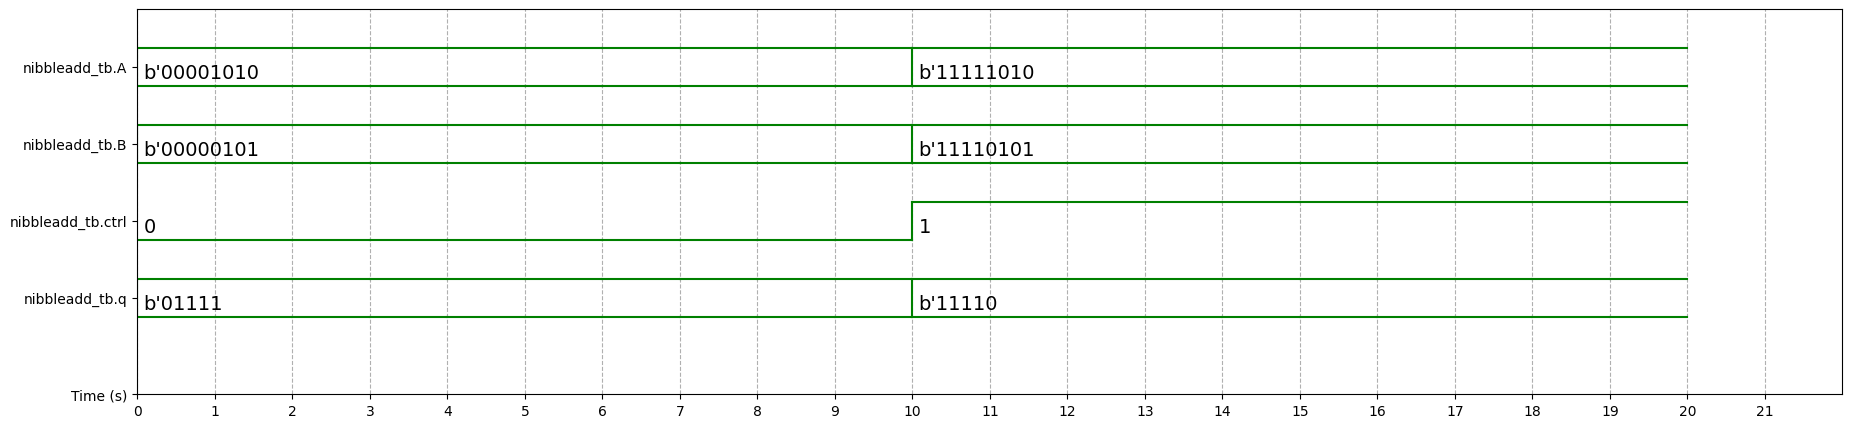

In [55]:
%%waveform nb_tb.vcd
#results with waveform
sign_list = ['nibbleadd_tb.A', 'nibbleadd_tb.B', 'nibbleadd_tb.ctrl', 'nibbleadd_tb.q']
time_begin = 0
time_end = 21
base = 'bin' # bin, dec, dec2, hex, octal

5. Here is a demo testbench result for the nibbleadd;

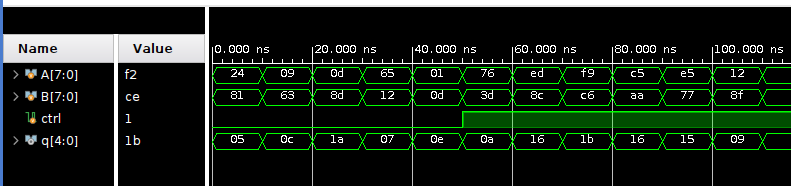

# Q5-CCTA

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the CCTA.
3. The specifications for this module CCTA are:
  - Inputs A, B and C are 4-bit vector inputs.
  - Output q is 5-bit wide.
  - rst is active high, when activated q is set to 0;
  - When ctrl input is ‘0’, output q is the sum of A and B.
  - When ctrl input is ‘1’, output q is the difference of A and C.

4. Write a Verilog test stimulus module for the CCTA;

In [56]:
%%verilog

//!DO NOT MODIFY MODULE NAME AND PORT NAME!

// I edited output type to "reg" to make code work
// have put in both waveform and monitor test to proof working
// have also done 2 sets of A B C values to proof math working

module CCTA(
        input [3:0] A,
        input [3:0] B,
        input [3:0] C,
        input rst,
        input ctrl,
        output reg [4:0] q
);

always @(*) begin
    if (rst) begin
      q <= 5'b00000;
    end else if (ctrl == 0) begin
      q <= A + B;
    end else begin
      q <= A - C;
    end
  end

endmodule

//TESTBENCH
module CCTA_tb;
  reg [3:0] A;
  reg [3:0] B;
  reg [3:0] C;
  reg rst;
  reg ctrl;
  wire [4:0] q;

  CCTA uut (A,B,C,rst,ctrl,q);

 initial begin
  $monitor($time, " A=%b,B=%b,C=%b,rst=%b,ctrl=%b,q=%b", A,B,C,rst,ctrl,q);
 end

  initial begin
    // Initialize inputs
    A = 4'b0010;
    B = 4'b0011;
    C = 4'b0001;

    // Test reset when ctrl = 0
    #0 ctrl = 0;
    #0 rst = 1;
    #10 rst = 0;
    // Test reset and difference when ctrl = 1
    #10 ctrl = 1;
    #10 rst = 1;

    //test again with different inputs
    #10 A = 4'b0001;
    #0 B = 4'b0010;
    #0 C = 4'b0011;

    // Test reset when ctrl = 0
    #0 ctrl = 0;
    #0 rst = 1;
    #10 rst = 0;
    // Test reset and difference when ctrl = 1
    #10 ctrl = 1;
    #10 rst = 1;

    #10 $finish;
  end

initial
  $monitor($time," A=%b,B=%b,C=%b,rst=%b,ctrl=%b,q=%b",A,B,C,rst,ctrl,q);

initial begin
  $dumpfile("CCTA_tb.vcd");
  $dumpvars(0,CCTA_tb);
  #81 $finish;
 end

endmodule

VCD info: dumpfile CCTA_tb.vcd opened for output.
                   0 A=0010,B=0011,C=0001,rst=1,ctrl=0,q=00000
                  10 A=0010,B=0011,C=0001,rst=0,ctrl=0,q=00101
                  20 A=0010,B=0011,C=0001,rst=0,ctrl=1,q=00001
                  30 A=0010,B=0011,C=0001,rst=1,ctrl=1,q=00000
                  40 A=0001,B=0010,C=0011,rst=1,ctrl=0,q=00000
                  50 A=0001,B=0010,C=0011,rst=0,ctrl=0,q=00011
                  60 A=0001,B=0010,C=0011,rst=0,ctrl=1,q=11110
                  70 A=0001,B=0010,C=0011,rst=1,ctrl=1,q=00000



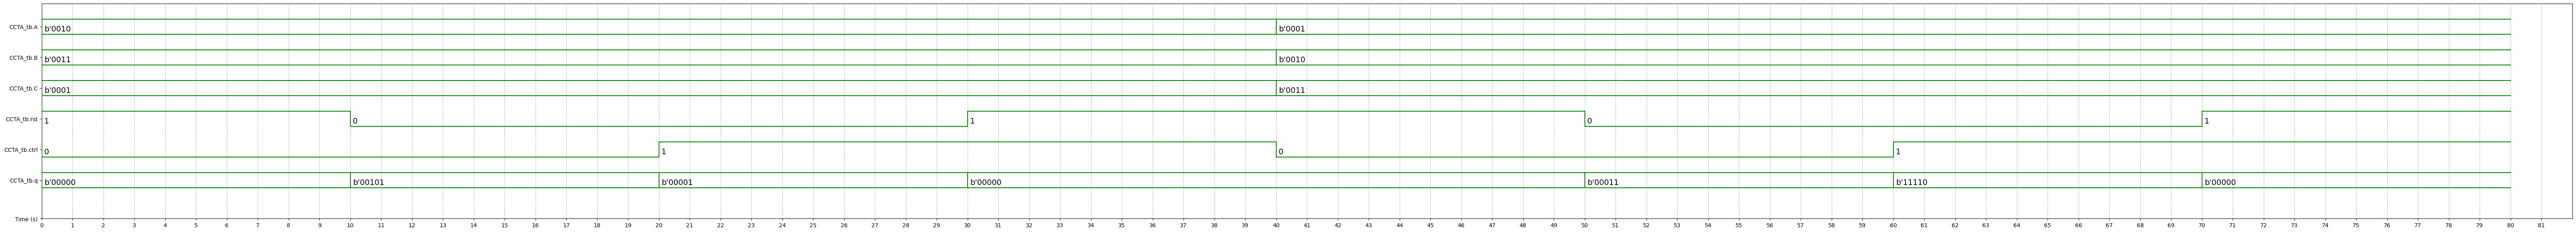

In [57]:
%%waveform CCTA_tb.vcd
#results with waveform
sign_list = ['CCTA_tb.A', 'CCTA_tb.B','CCTA_tb.C','CCTA_tb.rst', 'CCTA_tb.ctrl', 'CCTA_tb.q']
time_begin = 0
time_end = 81
base = 'bin' # bin, dec, dec2, hex, octal

5. Here is a demo testbench result for the CCTA;

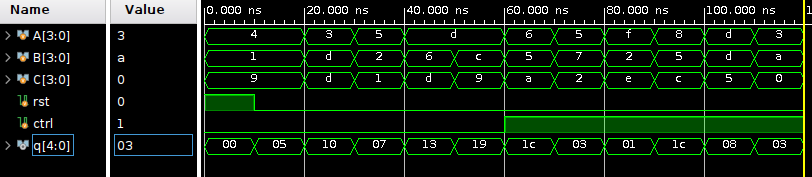